## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
X = boston.drop(columns=['medv']).copy()
y = boston['medv']

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [27]:
import pickle

with open('boston.pkl', 'rb') as arvore:
    X_train, y_train, X_test, y_test = pickle.load(arvore)


In [28]:
with open('boston.pkl', 'rb') as arvore:
  data = pickle.load(arvore)

print(type(data))

<class 'list'>


In [29]:
print(len(data))

4


In [30]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 11) (404,)
(102, 11) (102,)


In [31]:
arvore = DecisionTreeRegressor(max_depth=8)

arvore.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [34]:
predict = arvore.predict(X_test)
print('MSE da base de teste:',arvore.score(X_test,y_test))

MSE da base de teste: 0.6661612423078624


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [50]:
path = arvore.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.02610206e-14, 1.11386139e-04, 1.98019802e-04,
        3.09405941e-04, 3.09405941e-04, 6.06435644e-04, 1.23762376e-03,
        1.23762376e-03, 1.48927393e-03, 1.49752475e-03, 1.81930693e-03,
        2.18234323e-03, 2.78465347e-03, 4.22442244e-03, 4.46782178e-03,
        4.46782178e-03, 5.68399340e-03, 5.99009901e-03, 6.93481848e-03,
        7.29042904e-03, 7.73514851e-03, 7.92904290e-03, 9.90511551e-03,
        1.18935644e-02, 1.26732673e-02, 1.28919142e-02, 1.36162188e-02,
        1.38778878e-02, 1.51608911e-02, 1.56940610e-02, 1.58855886e-02,
        1.69430693e-02, 1.74298680e-02, 1.78712871e-02, 1.81200495e-02,
        2.05042433e-02, 2.05973597e-02, 2.31765677e-02, 2.32896040e-02,
        2.49653465e-02, 3.27475248e-02, 3.37953795e-02, 3.70050536e-02,
        4.05179614e-02, 4.25010314e-02, 4.47091584e-02, 4.48852742e-02,
        4.51651251e-02, 4.87651609e-02, 5.15221491e-02, 5.56930693e-02,
        5.91136256e-02, 6.46958241e-02, 6.49911145

Text(0, 0.5, 'Impureza total das folhas')

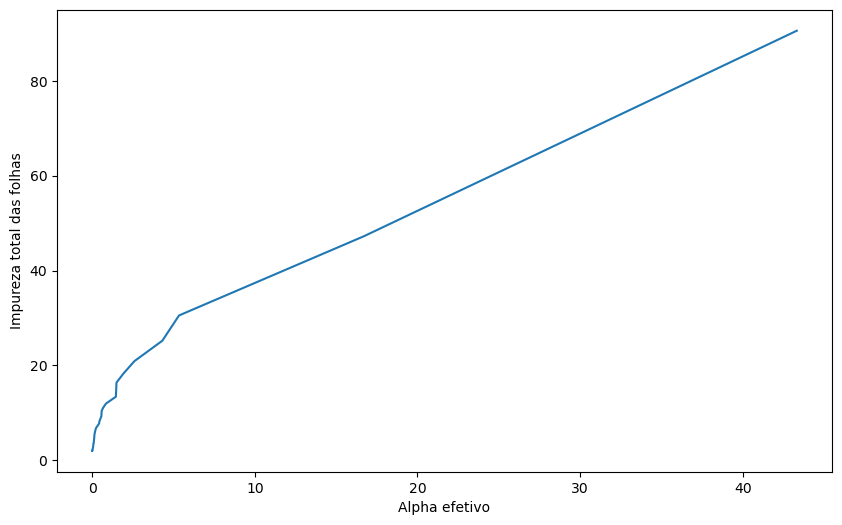

In [51]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt. figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt. xlabel ("Alpha efetivo")
plt. ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [52]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

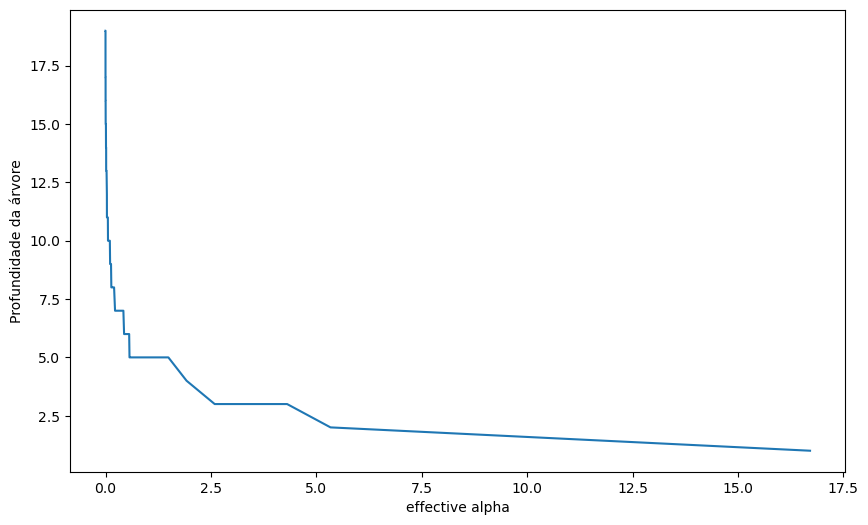

In [53]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], tree_depths [:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [56]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

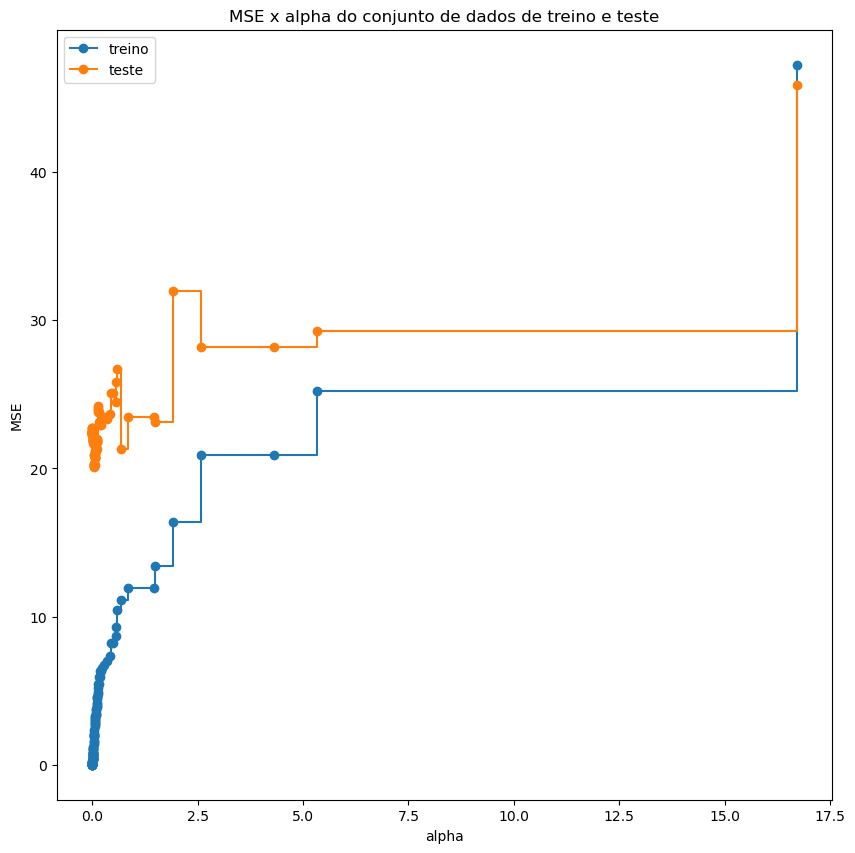

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

No gráfico vemos esse modelo, quanto maior o valor de Alpha, maior o valor de MSE, sendo assim, vou escolher o Alpha = 4.

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [59]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=4)
arvore_final.fit(X_train, y_train)

print(f"R-quadrado: {arvore_final.score(X_test, y_test):.2f}")

R-quadrado: 0.53


### 7. Visualize esta árvore.

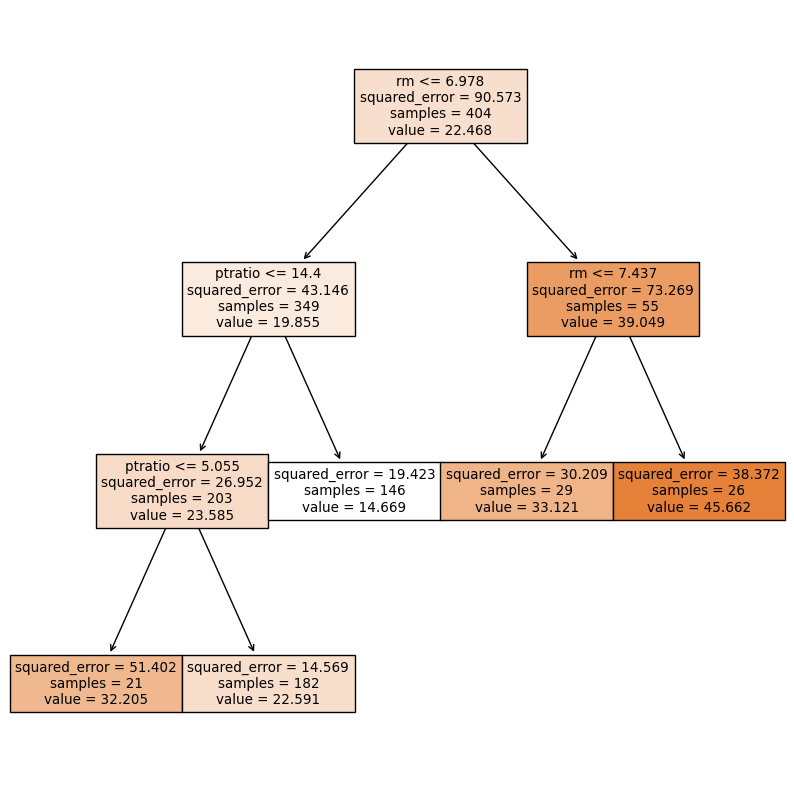

In [60]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_final, 
                    feature_names=X.columns,  
                    filled=True) 

Árvore final com melhor poda, comparada com a conseguida no final do exercicio 1.